# Tutorial exercises

We again use the wellbeing dataset, to practice running permutation tests.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Import and view the data

In [2]:
wb = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/WellbeingSample.csv')
wb

,ID_code,College,Subject,Score_preVac,Score_postVac
0,247610,Lonsdale,PPE,60,35
1,448590,Lonsdale,PPE,43,44
2,491100,Lonsdale,engineering,79,69
3,316150,Lonsdale,PPE,55,61
4,251870,Lonsdale,engineering,62,65
...,...,...,...,...,...
296,440570,Beaufort,history,75,70
297,826030,Beaufort,maths,52,49
298,856260,Beaufort,Biology,83,84
299,947060,Beaufort,engineering,62,65



### Questions

#### Test the following hypotheses:
    
1. Wellbeing scores pre- and post-vac are correlated in engineering students
2. There is a difference in the wellbeing scores of PPE students between Beaufort or Lonsdale (before the vacation)?
3. Wellbeing over all students increases across the vacation

#### Slightly harder one:

4. Wellbeing increases more across the vacation for Beaufort students than Lonsdale students 

#### Detailed Instructions

In each case 1-4, you will need to decide what to do, carry it out and and write it up:

**a. Hypotheses**
* what is our null hypothesis
* what is our alternative hypothesis?

Is it a paired or unpaired test for difference of means, or a correlation test?
* therefore which `permutation_type` is needed, `samples`, `pairings` or `independent`?
        
Is it a one- or two-tailed test?
* therefore which `alternative` hypothesis type is needed, `two-sided`, `greater` or `less`?

What $\alpha$ value will you use?
* what value must $p$ be smaller than, to reject the null hypothesis?
* this is the experimenter's choice but usually 0.05 is used (sometimes 0.001 or 0.001)

**b. Test statistic and descriptive statistics**

What is your test statistic?

Report appropriate descriptive statstics and plot the data (you should choose an appropriate plot type)

**c. Carry out the permutation test**

Carry out the test. Plot the null distribution. Report the $p$-value.

**d. Report your conclusion**

Will you reject the null hypothesis, or fail to reject it? What is your conclusion in plain English?

**e. Finally, write it up**

In each case, include a final cell in which you write the test up as if for a journal article





## 1. Wellbeing scores pre- and post-vac are correlated in engineering students

**a) Hypotheses etc**

$\mathcal{H_0}$: The correlation in wellbeing pre- and post- vacation is zero for engineering students

$\mathcal{H_a}$: The correlation in wellbeing pre- and post- vacation is greater than zero (students with high wellbeing before the vac also have high wellbeing after the vac)

We will test at the 5% ($\alpha=0.05$) level, one tailed as it only makes sense to look for a positive correlation (no sensible reason to think that those with the higherst scores pre-vac would have the *lowest* scores post vac)

As this is a correlation, we need `permutation_type = 'pairings'` (shuffle which datapoints are paired with which)

**b) Test statistic and descriptive statistics**

Test statistic is Pearson's r. The relevant descriptive statistics are the observed value of r, which is 0.78 (calculated below), and the sample size which is 61

In [3]:
# find the relevant data
prevac = wb.query('Subject=="engineering"').Score_preVac
postvac = wb.query('Subject=="engineering"').Score_postVac

prevac.corr(postvac)

0.7812255461336072

In [4]:
print('n pre = ' + str(prevac.count()))
print('n post = ' + str(postvac.count()))

n pre = 61
n post = 61


**Plot the data**: for a correlation, a scatter plot is good

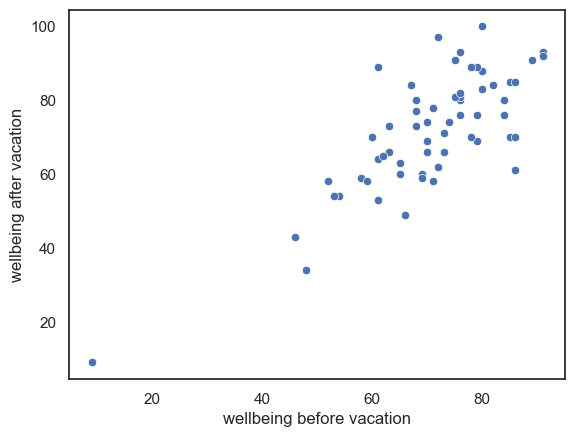

In [5]:
eng = wb.query('Subject == "engineering"')
sns.scatterplot(data=eng, x='Score_preVac', y='Score_postVac')
plt.xlabel('wellbeing before vacation'); plt.ylabel('wellbeing after vacation')
plt.show()

**c) Carry out the test**

In [6]:
# define a function that gives the correlation for two series x and y
# note that np.corrcoef returns a 2x2 matrix so we need to get just the relevant element
def mycorr(x,y):
    c = np.corrcoef(x,y)
    return c[0,1]

# run the permutation test
stats.permutation_test((prevac,postvac), mycorr, alternative='greater', permutation_type='pairings', n_resamples=10000)

PermutationTestResult(statistic=0.7812255461336072, pvalue=9.999000099990002e-05, null_distribution=array([ 0.17790933, -0.09285679, -0.07841174, ..., -0.03719625,
       -0.02918867,  0.18356174]))

**d) Report conclusion**

As the p value is much less than 0.05, we conclude that there is a significant correlation in wellbeing scores pre- and post- the vacation in engineering student

**e) Write up**

We hypothesised that wellbeing before and after the vacation would be correlated across individuals. We calculated Pearson's $r$ for a group of engineering students (n=61) before and after the vacation, and tested its significance using a permutation test. There was a highly significant positive correlation (r=0.78, p=0.000010, one tailed), meaning that students with higher wellbeing before the vacation also had high wellbeing after the vacation.

## 2. There is a difference in the wellbeing scores of PPE students between Beaufort or Lonsdale (before the vacation)

**a) Hypotheses etc**

$\mathcal{H_0}$: The mean wellbeing pre-vacation is the same in Beaufort and Lonsdale

$\mathcal{H_a}$: The mean wellbeing pre-vacation is different in Beaufort and Lonsdale

We will test at the 5% ($\alpha=0.05$) level, two-tailed as iwe have no a priori prediction about the direction of effect

As this is an independent samples test, we need `permutation_type = 'independent'` 

**b) Test statistic and descriptive statistics**

The test statistic is the difference of group means: 1.08 points.

The relevant descriptive statistics are the group means (Beaufort = 71.5, Lonsdale = 70.4) and a measure of spread for each group (standard deviation is good here: Beaufort = 10.9, Lonsdale = 13.2), and the sample size (Beaufort = 179, Lonsdale = 122).

In [7]:
# find the means, sd and n
wb.groupby('College').agg({'Score_preVac':['count','mean', 'std']})

Score_preVac                      
                count       mean        std
College                                    
Beaufort          179  71.469274  10.859310
Lonsdale          122  70.393443  13.215666

Plot the data: for comparing means between groups, a bar plot is good

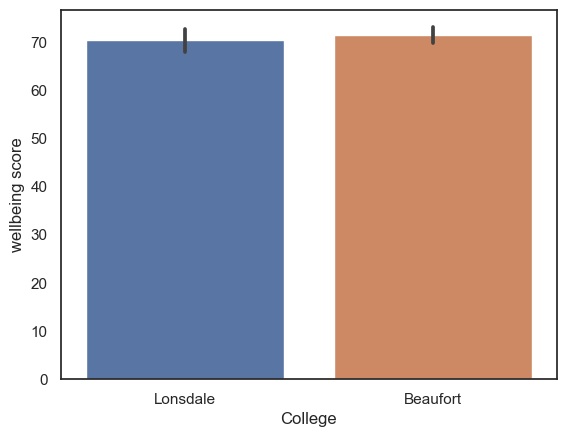

In [8]:
sns.barplot(data=wb, x='College', y='Score_preVac')
plt.ylabel('wellbeing score')
plt.show()

**c) Carry out the test**

In [9]:
# define a function that gives the difference of means for two independent samples
def dMeans(x,y):
    return np.mean(x)-np.mean(y)

# run the permutation test
stats.permutation_test((wb.query('College == "Beaufort"').Score_preVac, 
                        wb.query('College == "Lonsdale"').Score_preVac), 
                        dMeans, alternative='two-sided', permutation_type='independent', n_resamples=10000)



PermutationTestResult(statistic=1.075831120065942, pvalue=0.43495650434956507, null_distribution=array([-2.1081143 , -0.12331715,  0.38666545, ..., -0.0681839 ,
        0.22126568,  0.38666545]))

**d) Report conclusion**

As the p value is greater than 0.05, we conclude that there is no difference in wellbeing between colleged (pre vacation)

**e) Write up**

We hypothesised that wellbeing before and after the vacation would be different between Beaufort and Lonsdale colleges. We calculated the mean wellbeing score for students in two colleges, Beaufort and Lonsdale (n=179,122 respectively) before the vacation. The mean score was slightly higher in Beaufort college (Beaufort = 71.5, Lonsdale = 70.4)a but the difference was small compared to the standard deviation within each college (Beaufort = 10.9, Lonsdale = 13.2). We tested the difference of means using a permutation test and found no significant difference (p=0.44, two-tailed), meaning that there was no evidence of a difference in wellbeing between the colleges.

## 3. Wellbeing over all students increases across the vacation

**a) Hypotheses etc**

$\mathcal{H_0}$: Mean wellbeing is the same before and after the vacation

$\mathcal{H_a}$: Mean wellbeing is higher after the vacation

We will test at the 5% ($\alpha=0.05$) level, one-tailed as the question states a directional hypothesis

As this is an paired samples test (we compare each student to themself, across two time points), we need `permutation_type = 'samples'` 

**b) Test statistic and descriptive statistics**

The relevant test statistics are the mean difference in wellbeing score (an improvement of 2.587 points over the vacation), the standard deviation of differences (9.60), and the number of individual students ($n$=301), as these are the factors that will affect the significance of the paired test.

To give the reader a fuller picture of the data, it is also recommended to report the group means (pre = 71.0, post = 73.6) and a measure of spread for each group (standard deviation is good here: pre = 11.9, post = 14.2).

In [10]:
# find the means, sd and n
wb['Diff']=wb.Score_postVac - wb.Score_preVac
wb.agg({'Score_preVac':['count','mean', 'std'],
        'Score_postVac':['count','mean', 'std'],
        'Diff':['count','mean', 'std']})

,Score_preVac,Score_postVac,Diff
count,301.000000,301.000000,301.000000
mean,71.033223,73.617940,2.584718
std,11.861375,14.196838,9.601925


**Plot the data** for a mean difference in a large group, I'd suggest either a bar plot for the **difference**, or a scatter plot with reference line x=y. For a small group you could have done a line plot (where each pair is represented by two dots linked by a line)

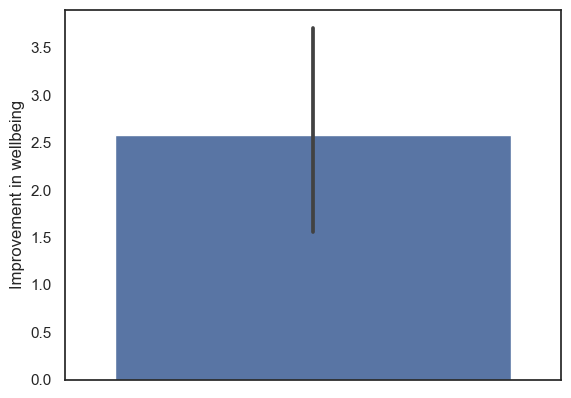

In [11]:
sns.barplot(data=wb, y='Diff')
plt.ylabel('Improvement in wellbeing')
plt.show()

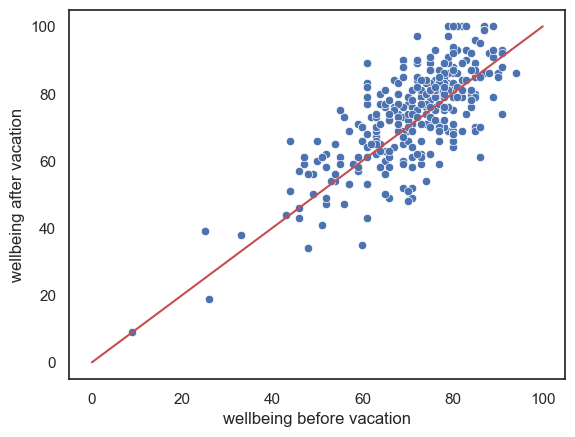

In [12]:
sns.scatterplot(data=wb, x='Score_preVac', y='Score_postVac')
plt.xlabel('wellbeing before vacation'); plt.ylabel('wellbeing after vacation')

# reference line x=y
plt.plot([0,100],[0,100],'r')
plt.show()

**c. Carry out the test**

In [13]:
# define a function that gives the mean pairwise difference in scores for the group
def mDiff(x,y):
    return np.mean(x-y)

# run the permutation test
# Take care to put the score that we expect to be higher first when entering the data, 
# as we are testing for a positive difference (alternative='greater')
stats.permutation_test((wb.Score_postVac, 
                        wb.Score_preVac), 
                        dMeans, alternative='greater', permutation_type='samples', n_resamples=10000)



PermutationTestResult(statistic=2.584717607973417, pvalue=9.999000099990002e-05, null_distribution=array([-0.65780731, -1.05647841,  0.33887043, ..., -0.06644518,
        0.09302326, -0.78405316]))

**d) Report conclusion**

As the p value is less than 0.05, we conclude that wellbeing does indeed inprove across the vacation

**e) Write up**

We hypothesised that wellbeing would increase across the vacation. We calculated the mean increase in wellbeing score for students (n=301) from before to after the vacation (an improvement of 2.587 points over the vacation; standard deviation of within-subjects improvement =  9.60). This was in the context of mean scores of around 70 (mean pre = 71.0, post = 73.6; standard deviation  pre = 11.9, post = 14.2).

We tested the significance of the mean improvement against zero using a permutation test and found that is was statistically signifiant (p=0.00020), indicating that wellbeing did indeed improve across the vacation.


# 4. Wellbeing increases more across the vacation for Beaufort students than Lonsdale students 

**a) Hypotheses etc**

$\mathcal{H_0}$: The mean increase in wellbeing from pre- to post- vacation is the same for Beaufort and Lonsdale students

$\mathcal{H_a}$: The mean increase in wellbeing from pre- to post- vacation is greater for Beaufort students than Lonsdale

We will test at the 5% ($\alpha=0.05$) level, one-tailed as the question states a directional hypothesis

This is an UNpaired test (comparing between two groups of students, in two colleges) although the improvement is inititally calculated by comparing each student to themself, across two time points); therefore we need `permutation_type = 'independent'` 

**b) Test statistic and descriptive statistics**

The relevant test statistics are the mean improvement in each college (Beaufort = 2.91, Lonsdale = 2.10) and standard deviation of the improvement in each college (Beaufort = 13.0, Lonsdale = 15.7), and the number of students in each college (179,122).

To give the reader a fuller picture of the data, you may like to give some additional statistics - you could report the mean wellbeing in each college (it is possible there could be no difference in improvement, whilst there is a difference in baseline wellbeing for example). These are included in the table below. 

In an exam you should make it clear which descriptives are relevant for the test and which are additional information - it is not sufficient to just dump in a table with all the descriptive statistics you can think of!

In [14]:
# find the means, sd and n
wb.groupby('College').agg({ 'Diff':['count','mean', 'std'],
                            'Score_postVac':['count','mean', 'std'],
                            'Score_preVac':['count','mean', 'std']})

Diff                     Score_postVac                        \
         count      mean       std         count       mean        std   
College                                                                  
Beaufort   179  2.910615  9.542504           179  74.379888  13.039303   
Lonsdale   122  2.106557  9.707974           122  72.500000  15.731345   

         Score_preVac                        
                count       mean        std  
College                                      
Beaufort          179  71.469274  10.859310  
Lonsdale          122  70.393443  13.215666

**Plot the data** as in q2, we are comparing group means (albeit in the improvement scores) so a bar plot will be appropriate

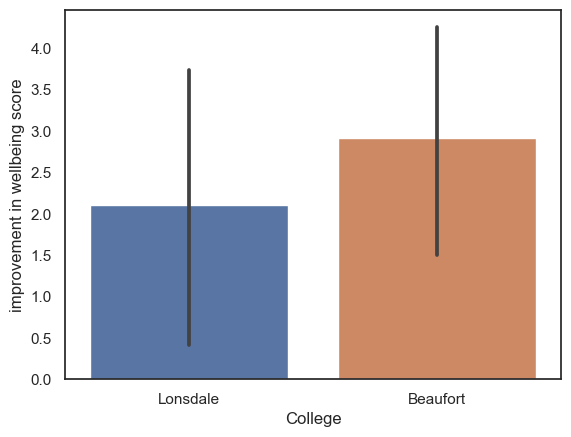

In [15]:
sns.barplot(data=wb, x='College', y='Diff')
plt.ylabel('improvement in wellbeing score')
plt.show()

**c. Carry out the test**

In [16]:
# define a function that gives the difference of means for two independent samples
def dMeans(x,y):
    return np.mean(x)-np.mean(y)

# run the permutation test
stats.permutation_test((wb.query('College == "Beaufort"').Diff, 
                        wb.query('College == "Lonsdale"').Diff), 
                        dMeans, alternative='greater', permutation_type='independent', n_resamples=10000)



PermutationTestResult(statistic=0.8040571480904846, pvalue=0.23787621237876214, null_distribution=array([-0.09185823, -1.67693928,  1.14863999, ...,  1.27268981,
       -1.2910065 ,  0.63865739]))

**d) Report conclusion**

As the p value is greater than 0.05, we conclude that the improvement is not greater for Beuar=fort than Lonsdale

**e) Write up**

We hypothesised that wellbeing would increase more across the vacation in Beaufort than Lonsdale college. We calculated the mean increase in wellbeing score for students (n=179,122 in Beaufort and Lonsdale) from before to after the vacation. The mean improvement was greater in Beuafort (2.91 vs 2.11 points; sd = 13.0 and 15.7points respectively). This was in the context of mean scores of around 70 (mean pre = 71.0, post = 73.6; standard deviation  pre = 11.9, post = 14.2).

We tested the significance of the difference in improvement between colleges using a permutation test and found that is was not statistically signifiant (p=0.24); we tehrefore found no evidence for a greater improvement in wellbeing in Bauefort students across the vacation.